In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.filterwarnings("ignore")

<h2>Bài tập 2.1</h2>
Sử dụng thông tin thống kê sau một thời gian, người quản lý nhân sự của một nhà máy đã xác định phân phối xác suất của biến X là số lượng nhân viên vắng mặt mỗi ngày. Biết X nhận các giá trị [0,1,2,3,4,5,6,7] với pmf cho trước [0.005,0.025,0.310,0.340,0.220,0.080,0.019,0.001]
<ol>
<li> Vẽ đồ thị PMF, vẽ đồ thị hàm CDF </li>
<li> Tìm xác suất để biến ngẫu nhiên nhận giá trị nhỏ hơn 5 </li>
<li> Tìm giá trị trung bình, phương sai, độ lệch tiêu chuẩn, trung vị, skewness </li>
</ol>

In [5]:
#1
rv = np.array(list(range(8)))
pmf = np.array([0.005,0.025,0.310,0.340,0.220,0.080,0.019,0.001])

<h3>1</h3>

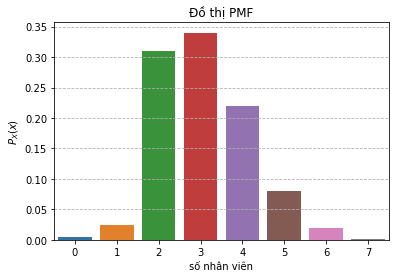

In [6]:
# Đồ thị PMF
PMF = sns.barplot(rv, pmf);
PMF.set(xlabel="số nhân viên", ylabel="$P_X(x)$")

plt.title("Đồ thị PMF")
plt.grid(axis='y', linestyle='--')
plt.show()

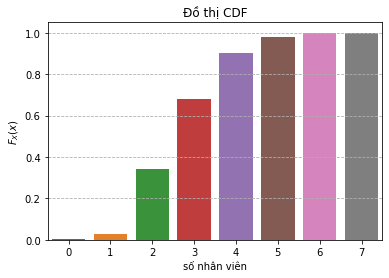

In [7]:
# Đồ thị CDF
cdf = [0]
for i in pmf:
  cdf.append(cdf[-1] + i)

CDF = sns.barplot(rv, cdf[1:]);
CDF.set(xlabel="số nhân viên", ylabel="$F_X(x)$")

plt.title("Đồ thị CDF")
plt.grid(axis='y', linestyle='--')
plt.show()

<h3>2</h3> Xác suất để có nhỏ hơn 5 nhân viên là:

$P(X < 5) = P_X(0) + P_X(1) + P_X(2) + P_X(3)+P_X(4)=0.005 + 0.025 + 0.310 + 0.340 + 0.220 = 0.9$

<h3>3</h3> Giá trị các thông số là:

In [9]:
print("Giá trị kì vọng là:", np.sum(rv * pmf))
print("Giá trị phương sai là:", np.sum(rv ** 2 * pmf) - np.sum(rv * pmf)**2)
print("Độ lệch chuẩn là:", np.sqrt(np.sum(rv ** 2 * pmf) - np.sum(rv * pmf)**2))
print("Giá trị trung vị là:", 2)
print("Giá trị skewness là:", np.sum((rv - np.sum(rv * pmf)) ** 3) / ((len(rv) - 1) * np.sqrt(np.sum(rv ** 2 * pmf) - np.sum(rv * pmf)) ** 3))

Giá trị kì vọng là: 3.066
Giá trị phương sai là: 1.1776440000000008
Độ lệch chuẩn là: 1.0851930703796449
Giá trị trung vị là: 2
Giá trị skewness là: 0.3839651699221635


<h2>Bài tập 2.2:</h2>
Biến ngẫu nhiên X có phân bố mũ với hàm mật độ xác suất cho bởi
$f(x;\theta)=\theta e^{-\theta x}$
,$x > 0$, trong đó $\theta$ là một tham số dương.
<ol>
<li> Tính xác suất để biến ngẫu nhiên nhận giá trị nhỏ hơn 1 </li>
<li> Tìm và vẽ hàm phân phối xác suất CDF của X </li>
<li> Tìm giá trị trung bình, phương sai của X </li>
</ol>

<h3>1</h3>
Ta có: $\int_{-\infty}^{+\infty}f(x;\theta)dx=\int_{0}^{+\infty}\theta e^{-\theta x}dx = -e^{-\theta x} |_0^{+\infty}=1$ $\Rightarrow$ Đây là một hàm PDF

Xác suất để biến ngẫu nhiên nhận giá trị nhỏ hơn 1 là: $\int_{-\infty}^{1}f(x;\theta)dx=\int_{0}^{1}\theta e^{-\theta x}dx = -e^{-\theta x} |_0^{1}=1 - e^{-\theta}$

<h3>2</h3>
$F(x;\theta) = P(X \leq x) = \int_{-\infty}^{x}f(x;\theta)=\int_{0}^{x}\theta e^{-\theta x} = -e^{-\theta x} |_0^{x} = 1 - e^{-\theta x}$ với $x>0$

Đồ thị hàm cdf là:

In [ ]:
x = np.linspace(0, 20, 1000)
f_theta1 = 1 - np.exp(-x)
f_theta2 = 1 - np.exp(-0.25 * x)
f_theta3 = 1 - np.exp(-2 * x)


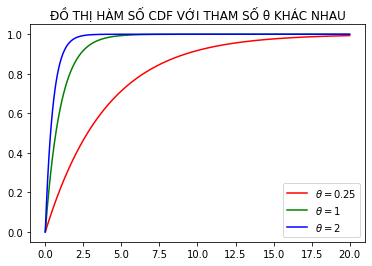

In [ ]:
plt.plot(x, f_theta2, c='r', label="$θ=0.25$")
plt.plot(x, f_theta1, c='g', label='$θ=1$')
plt.plot(x, f_theta3, c='b', label='$θ=2$')

plt.legend()
plt.title("ĐỒ THỊ HÀM SỐ CDF VỚI THAM SỐ θ KHÁC NHAU")
plt.show()

<h3>3</h3>
Giá trị trung bình của biến ngẫu nhiên là: $\int_{-\infty}^{+\infty}xf(x;\theta)dx=\int_{0}^{+\infty}x\theta e^{-\theta x} dx= -xe^{-\theta x} - \frac{e^{-\theta x}}{\theta} |_0^{+\infty} = \frac{1}{\theta}$

Phương sai của X:

$E(X^2) = \int_{-\infty}^{+\infty}x^2f(x;\theta)dx= \int_{0}^{+\infty}x^2f(x;\theta)dx = \int_{0}^{+\infty}x^2\theta e^{-\theta x}dx = -x^2e^{-\theta x} - \frac{2xe^{-\theta x}}{\theta} - \frac{2e^{-\theta x}}{\theta^2} |_0^{+\infty} = \frac{2}{\theta^2}$

$\Rightarrow VX = \frac{2}{\theta^2} - \frac{1}{\theta^2} = \frac{1}{\theta^2}$